# Intro to Linear to Logistic Regression Coefficients

- 06/15/22
- James Irving

## Learning Objectives



- To review how linear regression predicts a continuous value.
- To understand what coefficients are and how they are used to calcualte the target.

- Lesson Duration:
    - ~10 mins

# Predicting the Price of a Home Using Linear Regression

<img src="https://github.com/jirvingphd/from-linear-to-logistic-regression-brief-intro/blob/main/images/istock24011682medium_1200xx1697-955-0-88.jpg?raw=1" width=60% alt="Source: https://images.app.goo.gl/oJoMSGU8LGgDjkA76">

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')
plt.rcParams['figure.facecolor']='white'

In [2]:
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm
## Customized Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')

In [3]:
## Load in the King's County housing dataset and display the head and info
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv")
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


None

In [4]:
# ## FILTERING EXTREME VALUES FOR DEMONSTRATION PURPOSES
# df = df.loc[( df['bedrooms'] <8) & (df['price'] < 2_000_000) & df['bathrooms']>0]
# df

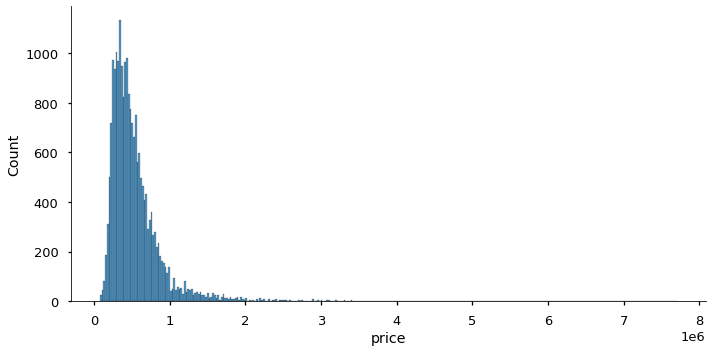

In [5]:

## Visualize the distribution of house prices (using seaborn!)
sns.displot(df['price'],aspect=2);

## Visualizing Our Features vs Our Target

- We want to determine how features of a home influence its sale price. 
- Specifically, we will be using:
    - `sqft_living`:Square-Footage of all Living Areas
    - `bedrooms`: # of Bedrooms
    - `bathrooms`: # of Bathrooms

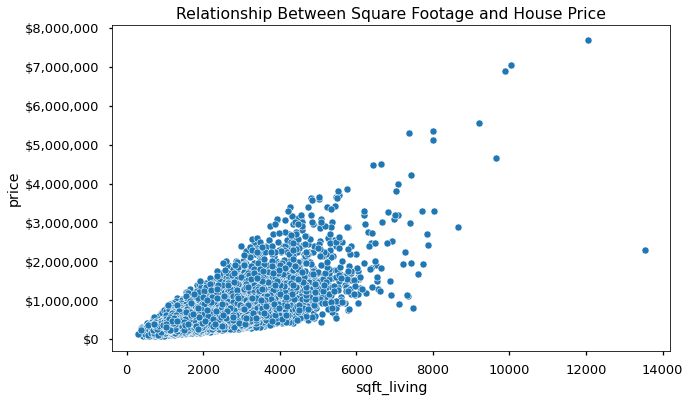

In [6]:
from matplotlib.ticker import StrMethodFormatter
## Plot a scatter plot of sqft-living vs price
ax = sns.scatterplot(data=df,x='sqft_living',y='price',s=50)
ax.set_title('Relationship Between Square Footage and House Price')

## Formatting Price Axis
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
ax.get_figure().set_size_inches(10,6)

- We can see a positive relationship between sqft-living and price, but it would be better if we could show the line-of-best-fit with it

### Functionizing Our Code

In [7]:
## NOTE: if we had more time, we would write this together.
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=2),
               scatter_kws=dict(s=50,edgecolor='white',lw=1,alpha=0.8)
                    )
    
    ax.get_figure().set_size_inches(10,6)
    ax.set_title(f'{x} vs {y}')
    ax.get_figure().set_facecolor('white')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    return ax

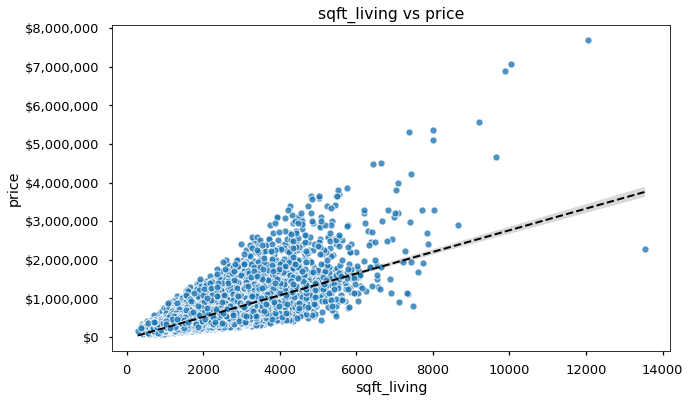

In [8]:
## Visualize the relationship between sqft_living and price
ax = plot_feature_vs_target(df,x='sqft_living');


### What Our Trendline Tells Us
- Our trendline summarizes the relationship between our feature and our target.
- It is comprised of the: <br>
1) y-intercept (AKA $c$ or $b$ or $\beta_{0}$) indicating the default value of y when X=0.<br>
2) and a slope (AKA $m$ or $\beta$) indicating the relationship between X and y. When X increases by 1, y increases by $m$.

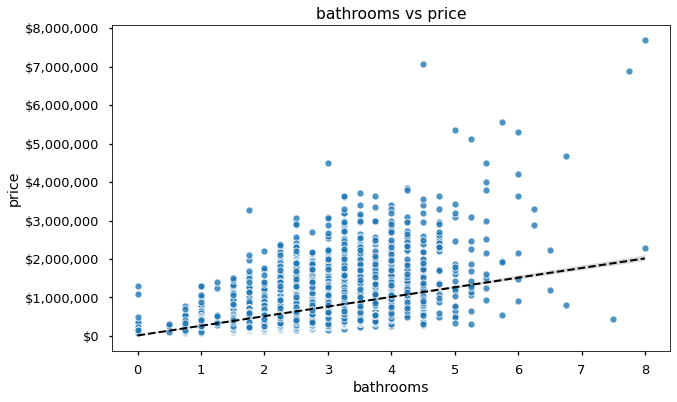

In [9]:
## Visualize the relationship between bathrooms and price
plot_feature_vs_target(df,x='bathrooms');

<AxesSubplot:title={'center':'bedrooms vs price'}, xlabel='bedrooms', ylabel='price'>

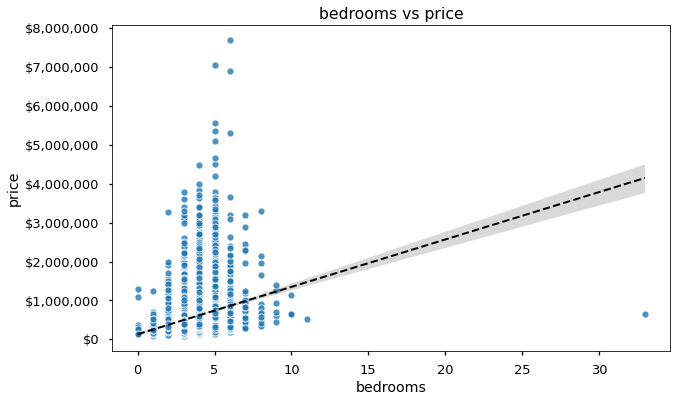

In [10]:
## Visualize the relationship between bedrooms and price
plot_feature_vs_target(df,x='bedrooms')

>- Now, let's create a Linear Regression model with sci-kit learn to determine the effect of these 3 features!

## Predicting House Price with sci-kit learn's `LinearRegression`

In [11]:
# ## Create our X & y using bedrooms,bathrooms, sqft-living
# use_cols = ['bedrooms','bathrooms','sqft_living']
# X = df[use_cols].copy()
# y = df['price'].copy()

# ## Train test split (random-state 321, test_size=0.25)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=321)
# X_train

In [12]:
# ## import LinearRegression from sklearn and fit the model
# from sklearn.linear_model import LinearRegression
# linreg = LinearRegression()
# linreg.fit(X_train,y_train)

In [13]:
# ## Get our models' R-squared value for the train and test data
# print(f"Training R-Squared: {linreg.score(X_train,y_train):.3f}")
# print(f"Test R-Squared: {linreg.score(X_test,y_test):.3f}")

>- Ok, so what does this tell us?
    - Our model can explain 52% of the variance of house price using just 3 features!

### What Coefficients Did Our Model Find? 

In [14]:
# linreg.coef_

In [15]:

# linreg.intercept_

In [16]:
# ## NOTE: with more time, we would code this together. 
# def get_coeffs(reg,X_train):
#     """Extracts the coefficients from a scikit-learn LinearRegression or LogisticRegression"""
#     coeffs = pd.Series(reg.coef_.flatten(),index=X_train.columns)

#     coeffs.loc['intercept'] = reg.intercept_

#     return coeffs

- Linear Regression Equation
$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n  $$
which we can simplify to:
$$ \hat y =  \sum_{i=0}^{N} \beta_i x_i  $$

In [17]:
# ## Get the coefficents from the model using our new function
# coeffs = get_coeffs(linreg,X_train)
# coeffs

>- **Each coefficient tells us the effect of increasing the values in that column by 1 unit.** 
>- According to our model, we can determine a home's price using the following results:
    - The model assumed a default/starting house price was \$130,191.2155 (the intercept)
    - For each additional bedrooms, subtract      \$-41,206.78
    - For each batrhoom, add \$13,537.01
    - For each square foot of living space, add \$243.11

In [18]:
# ## Let's select an example house and see how we calculate price
# i = 300
# house = X_test.iloc[i]
# house

In [19]:
# ## Calculate the home's predicted price using our coefficients
# price = house['bedrooms']*coeffs['bedrooms'] + \
#         house['bathrooms']*coeffs['bathrooms'] + \
#         house['sqft_living']*coeffs['sqft_living'] + coeffs['intercept']

# print(f"${price:,.2f}")

In [20]:
# coeffs.values

In [21]:
# ## What would our model predict for our test house?
# linreg.predict(house.values.reshape(1,-1))

In [22]:
# y_test.iloc[i]

## Linear Regression Summary
- Linear regression allowed us to predict the exact dollar price of a given home.
- It summarizes the relationship of each feature using coefficients, which are used to calculate the target. 

>-  But what do we do when we want to predict what group a house belongs to instead of an exact price?

# 📚 Comparing Coefficients & Using Scikit-Learn v1.1


- 06/21/22

In [23]:
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
## Load in the King's County housing dataset and display the head and info
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv",
                #  index_col=0
                 )
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


None

In [25]:
## Dropping some features for time
df = df.drop(columns=['date','view','id'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"221,900.0000",3,1.0000,1180,5650,1.0000,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,"538,000.0000",3,2.2500,2570,7242,2.0000,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,"180,000.0000",2,1.0000,770,10000,1.0000,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,"604,000.0000",4,3.0000,1960,5000,1.0000,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,"510,000.0000",3,2.0000,1680,8080,1.0000,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,"360,000.0000",3,2.5000,1530,1131,3.0000,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,"400,000.0000",4,2.5000,2310,5813,2.0000,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,"402,101.0000",2,0.7500,1020,1350,2.0000,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,"400,000.0000",3,2.5000,1600,2388,2.0000,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


In [26]:
## Treating zipcode as a category
df['zipcode'] = df['zipcode'].astype(str)

### Train Test Split

In [27]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8306,3,2.5000,2250,9235,2.0000,0,3,8,2250,0,1985,0,98052,47.7268,-122.1050,2290,8187
18426,4,2.7500,1590,6000,1.5000,0,4,8,1590,0,1925,0,98112,47.6401,-122.2990,1590,4000
11280,4,1.7500,2040,6000,1.0000,0,5,7,1020,1020,1943,0,98136,47.5507,-122.3830,1440,6000
13891,3,1.0000,1200,9800,1.0000,0,4,7,1200,0,1971,0,98072,47.7412,-122.1090,1220,10220
6498,3,2.2500,1570,8767,1.0000,0,3,7,1180,390,1990,0,98038,47.3568,-122.0380,1570,7434


In [28]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)
cat_cols

['zipcode']

In [29]:
# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)
num_cols


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [30]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'waterfront',
                                  'condition', 'grade', 'sqft_above',
                                  'sqft_basement', 'yr_built', 'yr_renovated',
                                  'lat', 'long', 'sqft_living15',
                                  'sqft_lot15']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['zipcode'])])

In [31]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [33]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features]
len(final_features)

86

In [34]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
8306,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
18426,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
11280,4.0000,1.7500,"2,040.0000","6,000.0000",1.0000,0.0000,5.0000,7.0000,"1,020.0000","1,020.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
13891,3.0000,1.0000,"1,200.0000","9,800.0000",1.0000,0.0000,4.0000,7.0000,"1,200.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6498,3.0000,2.2500,"1,570.0000","8,767.0000",1.0000,0.0000,3.0000,7.0000,"1,180.0000",390.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
16660,2.0000,1.7500,"2,050.0000","11,900.0000",1.0000,0.0000,4.0000,8.0000,"2,050.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2905,3.0000,1.5000,"1,690.0000","9,708.0000",1.5000,0.0000,5.0000,7.0000,"1,690.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7700,3.0000,2.7500,"3,470.0000","9,610.0000",3.0000,1.0000,3.0000,11.0000,"3,470.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16733,4.0000,2.5000,"2,530.0000","8,169.0000",2.0000,0.0000,3.0000,8.0000,"2,530.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
15334,3.0000,3.0000,"3,730.0000","383,328.0000",1.5000,0.0000,4.0000,9.0000,"2,230.0000","1,500.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [36]:
##import statsmodels correctly
import statsmodels.api as sm

In [37]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
8306,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
18426,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
16660,2.0000,1.7500,"2,050.0000","11,900.0000",1.0000,0.0000,4.0000,8.0000,"2,050.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2905,3.0000,1.5000,"1,690.0000","9,708.0000",1.5000,0.0000,5.0000,7.0000,"1,690.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


# Modeling with Statsmodels OLS

In [38]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     773.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:51:18   Log-Likelihood:            -2.1766e+05
No. Observations:               16209   AIC:                         4.355e+05
Df Residuals:                   16124   BIC:                         4.361e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.75e+04   1787.879    -15.383      0.000    -3.1e+04    -2.4e+04
bathrooms      2.487e+04   3085.738      8.059      0.000    1.88e+04    3.09e+04
sqft_living     114.1289      2.178     52.396      0.000     109.859     118.398
sqft_lot          0.2617      0.045      5.867      0.000       0.174       0.349
floors        -4.439e+04   3735.852    -11.881      0.000   -5.17e+04   -3.71e+04
waterfront     8.388e+05   1.54e+04     54.532      0.000    8.09e+05    8.69e+05
condition      2.506e+04   2276.565     11.009      0.000    2.06e+04    2.95e+04
grade          6.458e+04   2139.360     30.188      0.000    6.04e+04    6.88e+04
sqft_above       86.4948      2.234     38.712      0.000      82.115      90.874
sqft_basement    27.6336      2.543     10.866      0.000      22.649      32.618
yr_built       -790.0171     76.684    -10.302      0.000    -940.327    -639.707
yr_renovated     16.8340      3.467      4.856      0.000      10.039      23.629
lat            1.457e+05   7.48e+04      1.947      0.052    -988.291    2.92e+05
long          -1.451e+05   5.31e+04     -2.730      0.006   -2.49e+05   -4.09e+04
sqft_living15    28.3158      3.382      8.372      0.000      21.687      34.945
sqft_lot15       -0.0954      0.069     -1.374      0.169      -0.232       0.041
zipcode_98001  -5.01e+05   9.84e+04     -5.089      0.000   -6.94e+05   -3.08e+05
zipcode_98002 -4.658e+05    9.6e+04     -4.851      0.000   -6.54e+05   -2.78e+05
zipcode_98003 -5.248e+05   1.01e+05     -5.212      0.000   -7.22e+05   -3.27e+05
zipcode_98004  2.372e+05   1.04e+05      2.283      0.022    3.36e+04    4.41e+05
zipcode_98005 -2.472e+05   1.03e+05     -2.410      0.016   -4.48e+05   -4.62e+04
zipcode_98006 -2.627e+05   9.91e+04     -2.651      0.008   -4.57e+05   -6.85e+04
zipcode_98007 -2.971e+05   1.02e+05     -2.924      0.003   -4.96e+05   -9.79e+04
zipcode_98008  -2.64e+05   9.99e+04     -2.642      0.008    -4.6e+05   -6.82e+04
zipcode_98010 -4.093e+05   8.73e+04     -4.688      0.000    -5.8e+05   -2.38e+05
zipcode_98011 -4.534e+05   1.09e+05     -4.149      0.000   -6.68e+05   -2.39e+05
zipcode_98014 -4.021e+05   9.22e+04     -4.363      0.000   -5.83e+05   -2.21e+05
zipcode_98019 -4.412e+05   9.85e+04     -4.480      0.000   -6.34e+05   -2.48e+05
zipcode_98022 -4.347e+05   8.34e+04     -5.212      0.000   -5.98e+05   -2.71e+05
zipcode_98023 -5.597e+05   1.03e+05     -5.432      0.000   -7.62e+05   -3.58e+05
zipcode_98024 -3.282e+05   9.08e+04     -3.615      0.000   -5.06e+05    -1.5e+05
zipcode_98027  -3.36e+05   9.33e+04     -3.600      0.000   -5.19e+05   -1.53e+05
zipcode_98028 -4.521e+05   1.11e+05     -4.071      0.000    -6.7e+05   -2.34e+05
zipcode_98029 -3.066e+05   9.29e+04     -3.299      0.001   -4.89e+05   -1.24e+05
zipcode_98030 -5.002e+05    9.6e+04     -5.210   

In [39]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.801
Testing R^2: 0.792


## The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

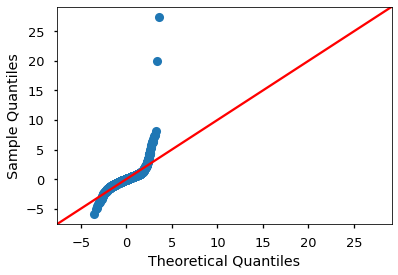

In [40]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

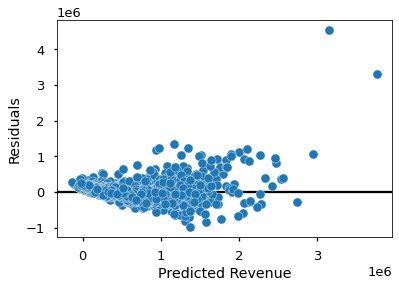

In [41]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

In [42]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     773.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:51:19   Log-Likelihood:            -2.1766e+05
No. Observations:               16209   AIC:                         4.355e+05
Df Residuals:                   16124   BIC:                         4.361e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.75e+04   1787.879    -15.383      0.000    -3.1e+04    -2.4e+04
bathrooms      2.487e+04   3085.738      8.059      0.000    1.88e+04    3.09e+04
sqft_living     114.1289      2.178     52.396      0.000     109.859     118.398
sqft_lot          0.2617      0.045      5.867      0.000       0.174       0.349
floors        -4.439e+04   3735.852    -11.881      0.000   -5.17e+04   -3.71e+04
waterfront     8.388e+05   1.54e+04     54.532      0.000    8.09e+05    8.69e+05
condition      2.506e+04   2276.565     11.009      0.000    2.06e+04    2.95e+04
grade          6.458e+04   2139.360     30.188      0.000    6.04e+04    6.88e+04
sqft_above       86.4948      2.234     38.712      0.000      82.115      90.874
sqft_basement    27.6336      2.543     10.866      0.000      22.649      32.618
yr_built       -790.0171     76.684    -10.302      0.000    -940.327    -639.707
yr_renovated     16.8340      3.467      4.856      0.000      10.039      23.629
lat            1.457e+05   7.48e+04      1.947      0.052    -988.291    2.92e+05
long          -1.451e+05   5.31e+04     -2.730      0.006   -2.49e+05   -4.09e+04
sqft_living15    28.3158      3.382      8.372      0.000      21.687      34.945
sqft_lot15       -0.0954      0.069     -1.374      0.169      -0.232       0.041
zipcode_98001  -5.01e+05   9.84e+04     -5.089      0.000   -6.94e+05   -3.08e+05
zipcode_98002 -4.658e+05    9.6e+04     -4.851      0.000   -6.54e+05   -2.78e+05
zipcode_98003 -5.248e+05   1.01e+05     -5.212      0.000   -7.22e+05   -3.27e+05
zipcode_98004  2.372e+05   1.04e+05      2.283      0.022    3.36e+04    4.41e+05
zipcode_98005 -2.472e+05   1.03e+05     -2.410      0.016   -4.48e+05   -4.62e+04
zipcode_98006 -2.627e+05   9.91e+04     -2.651      0.008   -4.57e+05   -6.85e+04
zipcode_98007 -2.971e+05   1.02e+05     -2.924      0.003   -4.96e+05   -9.79e+04
zipcode_98008  -2.64e+05   9.99e+04     -2.642      0.008    -4.6e+05   -6.82e+04
zipcode_98010 -4.093e+05   8.73e+04     -4.688      0.000    -5.8e+05   -2.38e+05
zipcode_98011 -4.534e+05   1.09e+05     -4.149      0.000   -6.68e+05   -2.39e+05
zipcode_98014 -4.021e+05   9.22e+04     -4.363      0.000   -5.83e+05   -2.21e+05
zipcode_98019 -4.412e+05   9.85e+04     -4.480      0.000   -6.34e+05   -2.48e+05
zipcode_98022 -4.347e+05   8.34e+04     -5.212      0.000   -5.98e+05   -2.71e+05
zipcode_98023 -5.597e+05   1.03e+05     -5.432      0.000   -7.62e+05   -3.58e+05
zipcode_98024 -3.282e+05   9.08e+04     -3.615      0.000   -5.06e+05    -1.5e+05
zipcode_98027  -3.36e+05   9.33e+04     -3.600      0.000   -5.19e+05   -1.53e+05
zipcode_98028 -4.521e+05   1.11e+05     -4.071      0.000    -6.7e+05   -2.34e+05
zipcode_98029 -3.066e+05   9.29e+04     -3.299      0.001   -4.89e+05   -1.24e+05
zipcode_98030 -5.002e+05    9.6e+04     -5.210   

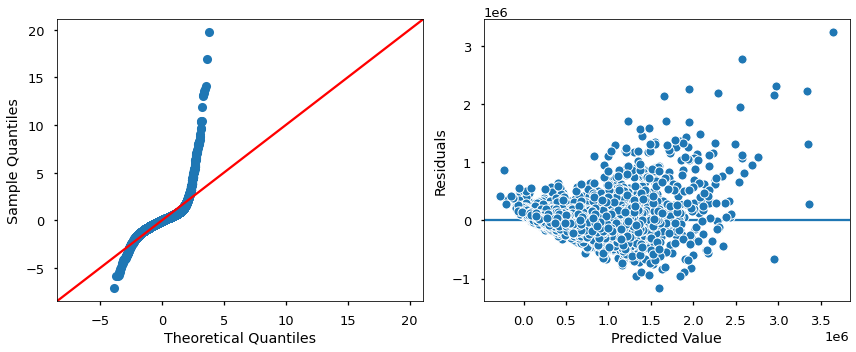

In [43]:

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model

## Functionizing Preprocessing 

In [44]:
## functionize preprocessing
def prepare_data(df_, drop_cols = [], preview_X=False):
  ## Dropping some features for time
  df = df_.drop(columns=drop_cols)
  ## Treating zipcode as a category
  df['zipcode'] = df['zipcode'].astype(str)

  ## Make x and y variables
  y = df['price'].copy()
  X = df.drop(columns=['price']).copy()

  X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
  ## cat selector
  cat_sel = make_column_selector(dtype_include='object')
  cat_cols = cat_sel(X)
  

  # num selectorr
  num_sel = make_column_selector(dtype_include='number')
  num_cols = num_sel(X)

  ## make pipelines
  cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                        fill_value='MISSING'),
                          OneHotEncoder(handle_unknown='ignore', sparse=False))
  
  num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                          )

  preprocessor = make_column_transformer((num_pipe, num_cols),
                                        (cat_pipe,cat_cols),remainder='passthrough')
  ## fit the col transformer
  preprocessor.fit(X_train)
  ## save feature names
  cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
  final_features = [*num_cols,*cat_features]
  X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
  X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)

  ## Make final X_train_df and X_test_df with constants added
  X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
  X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')

  if preview_X:
    display(X_train_df.head(3))
    # X_train_df.info()
  return X_train_df, X_test_df, y_train, y_test

In [45]:
##import statsmodels correctly
import statsmodels.api as sm

In [46]:
X_train_df, X_test_df, y_train, y_test = prepare_data(df, preview_X=True)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
8306,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
18426,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
11280,4.0000,1.7500,"2,040.0000","6,000.0000",1.0000,0.0000,5.0000,7.0000,"1,020.0000","1,020.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


# Baseline Model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
8306,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
18426,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
11280,4.0000,1.7500,"2,040.0000","6,000.0000",1.0000,0.0000,5.0000,7.0000,"1,020.0000","1,020.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     773.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:51:19   Log-Likelihood:            -2.1766e+05
No. Observations:               16209   AIC:                         4.355e+05
Df Residuals:                   16124   BIC:                         4.361e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.75e+04   1787.879    -15.383      0.000    -3.1e+04    -2.4e+04
bathrooms      2.487e+04   3085.738      8.059      0.000    1.88e+04    3.09e+04
sqft_living     114.1289      2.178     52.396      0.000     109.859     118.398
sqft_lot          0.2617      0.045      5.867      0.000       0.174       0.349
floors        -4.439e+04   3735.852    -11.881      0.000   -5.17e+04   -3.71e+04
waterfront     8.388e+05   1.54e+04     54.532      0.000    8.09e+05    8.69e+05
condition      2.506e+04   2276.565     11.009      0.000    2.06e+04    2.95e+04
grade          6.458e+04   2139.360     30.188      0.000    6.04e+04    6.88e+04
sqft_above       86.4948      2.234     38.712      0.000      82.115      90.874
sqft_basement    27.6336      2.543     10.866      0.000      22.649      32.618
yr_built       -790.0171     76.684    -10.302      0.000    -940.327    -639.707
yr_renovated     16.8340      3.467      4.856      0.000      10.039      23.629
lat            1.457e+05   7.48e+04      1.947      0.052    -988.291    2.92e+05
long          -1.451e+05   5.31e+04     -2.730      0.006   -2.49e+05   -4.09e+04
sqft_living15    28.3158      3.382      8.372      0.000      21.687      34.945
sqft_lot15       -0.0954      0.069     -1.374      0.169      -0.232       0.041
zipcode_98001  -5.01e+05   9.84e+04     -5.089      0.000   -6.94e+05   -3.08e+05
zipcode_98002 -4.658e+05    9.6e+04     -4.851      0.000   -6.54e+05   -2.78e+05
zipcode_98003 -5.248e+05   1.01e+05     -5.212      0.000   -7.22e+05   -3.27e+05
zipcode_98004  2.372e+05   1.04e+05      2.283      0.022    3.36e+04    4.41e+05
zipcode_98005 -2.472e+05   1.03e+05     -2.410      0.016   -4.48e+05   -4.62e+04
zipcode_98006 -2.627e+05   9.91e+04     -2.651      0.008   -4.57e+05   -6.85e+04
zipcode_98007 -2.971e+05   1.02e+05     -2.924      0.003   -4.96e+05   -9.79e+04
zipcode_98008  -2.64e+05   9.99e+04     -2.642      0.008    -4.6e+05   -6.82e+04
zipcode_98010 -4.093e+05   8.73e+04     -4.688      0.000    -5.8e+05   -2.38e+05
zipcode_98011 -4.534e+05   1.09e+05     -4.149      0.000   -6.68e+05   -2.39e+05
zipcode_98014 -4.021e+05   9.22e+04     -4.363      0.000   -5.83e+05   -2.21e+05
zipcode_98019 -4.412e+05   9.85e+04     -4.480      0.000   -6.34e+05   -2.48e+05
zipcode_98022 -4.347e+05   8.34e+04     -5.212      0.000   -5.98e+05   -2.71e+05
zipcode_98023 -5.597e+05   1.03e+05     -5.432      0.000   -7.62e+05   -3.58e+05
zipcode_98024 -3.282e+05   9.08e+04     -3.615      0.000   -5.06e+05    -1.5e+05
zipcode_98027  -3.36e+05   9.33e+04     -3.600      0.000   -5.19e+05   -1.53e+05
zipcode_98028 -4.521e+05   1.11e+05     -4.071      0.000    -6.7e+05   -2.34e+05
zipcode_98029 -3.066e+05   9.29e+04     -3.299      0.001   -4.89e+05   -1.24e+05
zipcode_98030 -5.002e+05    9.6e+04     -5.210   

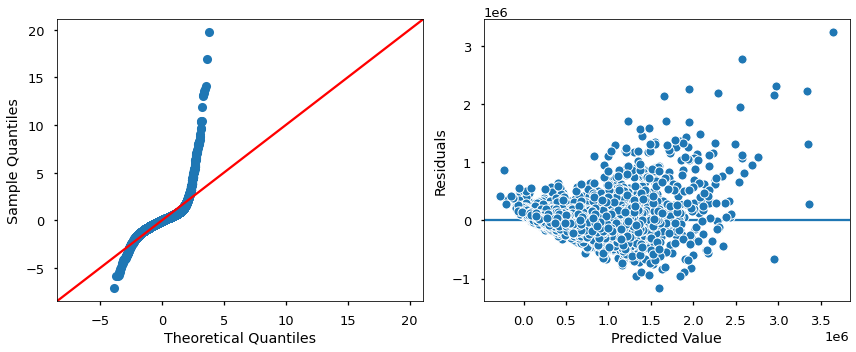

In [47]:
X_train_df, X_test_df, y_train, y_test = prepare_data(df, preview_X=True)


## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df, y_train)


# Removing Outliers

In [48]:
from scipy import stats
def find_outliers_Z(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")

    outliers = pd.Series(outliers, index=data.index, name=data.name)
    return outliers

def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
    outliers = pd.Series(outliers, index=data.index, name=data.name)
    return outliers

In [49]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [50]:
## Loop to remove outliers from same clumns using new function
outlier_cols = num_cols#['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers_Z(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()
    

- 406 outliers found in price using Z-Scores.
- 1159 outliers found in price using IQR.

- 75 outliers found in bedrooms using Z-Scores.
- 546 outliers found in bedrooms using IQR.

- 187 outliers found in bathrooms using Z-Scores.
- 571 outliers found in bathrooms using IQR.

- 248 outliers found in sqft_living using Z-Scores.
- 572 outliers found in sqft_living using IQR.

- 347 outliers found in sqft_lot using Z-Scores.
- 2425 outliers found in sqft_lot using IQR.

- 8 outliers found in floors using Z-Scores.
- 0 outliers found in floors using IQR.

- 163 outliers found in waterfront using Z-Scores.
- 163 outliers found in waterfront using IQR.

- 30 outliers found in condition using Z-Scores.
- 30 outliers found in condition using IQR.

- 136 outliers found in grade using Z-Scores.
- 1911 outliers found in grade using IQR.

- 254 outliers found in sqft_above using Z-Scores.
- 611 outliers found in sqft_above using IQR.

- 247 outliers found in sqft_basement using Z-Scores.
- 496 ou

## Model 2 - Outliers Removed via Z-Scores

In [51]:
# remove_outliers 
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
  try:
    df_clean_z = df_clean_z[~idx_outliers]
  except:
    print(col, len(idx_outliers), len(df_clean_z))
df_clean_z

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8931/188155826.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[~idx_outliers]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"221,900.0000",3,1.0000,1180,5650,1.0000,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
2,"180,000.0000",2,1.0000,770,10000,1.0000,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,"604,000.0000",4,3.0000,1960,5000,1.0000,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,"510,000.0000",3,2.0000,1680,8080,1.0000,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
6,"257,500.0000",3,2.2500,1715,6819,2.0000,0,3,7,1715,0,1995,0,98003,47.3097,-122.3270,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,"360,000.0000",3,2.5000,1530,1131,3.0000,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,"400,000.0000",4,2.5000,2310,5813,2.0000,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,"402,101.0000",2,0.7500,1020,1350,2.0000,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,"400,000.0000",3,2.5000,1600,2388,2.0000,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     796.0
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:51:19   Log-Likelihood:            -1.8565e+05
No. Observations:               14341   AIC:                         3.715e+05
Df Residuals:                   14258   BIC:                         3.721e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -8939.7859   1326.278     -6.741      0.000   -1.15e+04   -6340.109
bathrooms      1.933e+04   2180.560      8.864      0.000    1.51e+04    2.36e+04
sqft_living      74.3582      1.671     44.493      0.000      71.082      77.634
sqft_lot          1.1883      0.131      9.071      0.000       0.931       1.445
floors        -2.286e+04   2543.346     -8.989      0.000   -2.78e+04   -1.79e+04
waterfront    -1.187e-07   4.25e-08     -2.793      0.005   -2.02e-07   -3.54e-08
condition      2.748e+04   1517.767     18.105      0.000    2.45e+04    3.05e+04
grade          5.338e+04   1492.752     35.761      0.000    5.05e+04    5.63e+04
sqft_above       61.4580      1.646     37.332      0.000      58.231      64.685
sqft_basement    12.8991      1.861      6.933      0.000       9.252      16.546
yr_built       -618.6221     52.042    -11.887      0.000    -720.630    -516.614
yr_renovated  -4.921e-07   1.74e-07     -2.823      0.005   -8.34e-07    -1.5e-07
lat            5.392e+04   5.17e+04      1.043      0.297   -4.74e+04    1.55e+05
long          -1.296e+05    4.9e+04     -2.642      0.008   -2.26e+05   -3.34e+04
sqft_living15    39.1074      2.498     15.655      0.000      34.211      44.004
sqft_lot15       -0.9270      0.177     -5.245      0.000      -1.273      -0.581
zipcode_98001 -4.299e+05   8.76e+04     -4.906      0.000   -6.02e+05   -2.58e+05
zipcode_98002 -4.113e+05   8.51e+04     -4.836      0.000   -5.78e+05   -2.45e+05
zipcode_98003  -4.39e+05   8.95e+04     -4.904      0.000   -6.14e+05   -2.64e+05
zipcode_98004  1.526e+05    8.8e+04      1.734      0.083   -1.99e+04    3.25e+05
zipcode_98005 -1.268e+05   8.67e+04     -1.464      0.143   -2.97e+05     4.3e+04
zipcode_98006 -1.549e+05   8.46e+04     -1.832      0.067   -3.21e+05    1.08e+04
zipcode_98007 -1.891e+05   8.54e+04     -2.214      0.027   -3.57e+05   -2.17e+04
zipcode_98008 -1.834e+05   8.41e+04     -2.181      0.029   -3.48e+05   -1.86e+04
zipcode_98010 -3.282e+05   7.66e+04     -4.285      0.000   -4.78e+05   -1.78e+05
zipcode_98011 -3.168e+05   9.05e+04     -3.500      0.000   -4.94e+05   -1.39e+05
zipcode_98014 -2.813e+05   7.76e+04     -3.626      0.000   -4.33e+05   -1.29e+05
zipcode_98019 -3.291e+05   8.04e+04     -4.091      0.000   -4.87e+05   -1.71e+05
zipcode_98022   -3.8e+05   7.44e+04     -5.105      0.000   -5.26e+05   -2.34e+05
zipcode_98023 -4.685e+05   9.19e+04     -5.097      0.000   -6.49e+05   -2.88e+05
zipcode_98024 -2.532e+05   7.58e+04     -3.338      0.001   -4.02e+05   -1.04e+05
zipcode_98027 -2.258e+05   7.97e+04     -2.834      0.005   -3.82e+05   -6.96e+04
zipcode_98028 -3.241e+05   9.22e+04     -3.514      0.000   -5.05e+05   -1.43e+05
zipcode_98029 -1.951e+05   7.83e+04     -2.493      0.013   -3.49e+05   -4.17e+04
zipcode_98030  -4.22e+05   8.43e+04     -5.003   

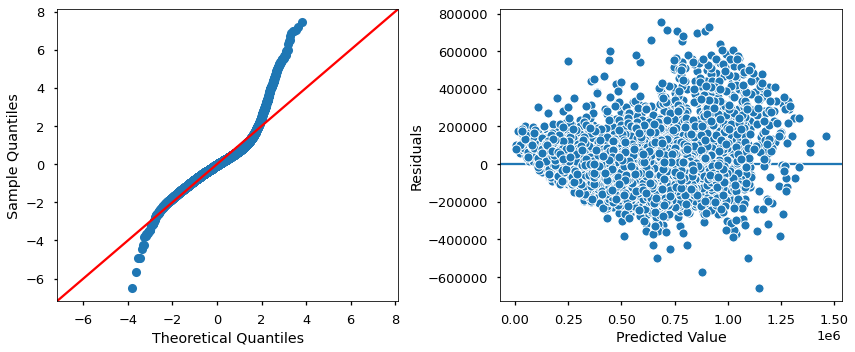

In [52]:
X_train_df, X_test_df, y_train, y_test = prepare_data(df_clean_z)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

## Model 3 - Outliers Removed IQR Rule

In [53]:
# remove_outliers
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8931/739513175.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_iqr = df_clean_iqr[~idx_outliers]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"221,900.0000",3,1.0000,1180,5650,1.0000,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
2,"180,000.0000",2,1.0000,770,10000,1.0000,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,"604,000.0000",4,3.0000,1960,5000,1.0000,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,"510,000.0000",3,2.0000,1680,8080,1.0000,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
6,"257,500.0000",3,2.2500,1715,6819,2.0000,0,3,7,1715,0,1995,0,98003,47.3097,-122.3270,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,"360,000.0000",3,2.5000,1530,1131,3.0000,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,"400,000.0000",4,2.5000,2310,5813,2.0000,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,"402,101.0000",2,0.7500,1020,1350,2.0000,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,"400,000.0000",3,2.5000,1600,2388,2.0000,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     683.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:51:20   Log-Likelihood:            -1.5092e+05
No. Observations:               11904   AIC:                         3.020e+05
Df Residuals:                   11822   BIC:                         3.026e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3424.9630   1229.045     -2.787      0.005   -5834.095   -1015.831
bathrooms      1.106e+04   1911.810      5.785      0.000    7312.983    1.48e+04
sqft_living      66.0074      1.543     42.781      0.000      62.983      69.032
sqft_lot          1.0328      0.459      2.248      0.025       0.132       1.933
floors        -1.378e+04   2276.866     -6.053      0.000   -1.82e+04   -9318.958
waterfront     1.067e-06    1.3e-06      0.819      0.413   -1.49e-06    3.62e-06
condition      2.454e+04   1286.986     19.071      0.000     2.2e+04    2.71e+04
grade          4.265e+04   1439.160     29.632      0.000    3.98e+04    4.55e+04
sqft_above       53.4504      1.534     34.844      0.000      50.444      56.457
sqft_basement    12.5572      1.720      7.301      0.000       9.186      15.928
yr_built       -546.3179     44.955    -12.153      0.000    -634.437    -458.199
yr_renovated  -1.049e-07    1.3e-07     -0.808      0.419   -3.59e-07     1.5e-07
lat            -1.43e+04   4.63e+04     -0.308      0.758   -1.05e+05    7.66e+04
long           2.633e+04   4.66e+04      0.565      0.572    -6.5e+04    1.18e+05
sqft_living15    39.7905      2.335     17.040      0.000      35.213      44.368
sqft_lot15        0.4637      0.542      0.855      0.393      -0.599       1.527
zipcode_98001 -1.217e+05   8.44e+04     -1.441      0.149   -2.87e+05    4.38e+04
zipcode_98002 -1.061e+05   8.19e+04     -1.296      0.195   -2.67e+05    5.44e+04
zipcode_98003 -1.136e+05   8.62e+04     -1.318      0.188   -2.82e+05    5.54e+04
zipcode_98004  3.849e+05   8.45e+04      4.553      0.000    2.19e+05    5.51e+05
zipcode_98005  2.079e+05   8.32e+04      2.499      0.012    4.48e+04    3.71e+05
zipcode_98006  1.368e+05   8.16e+04      1.676      0.094   -2.32e+04    2.97e+05
zipcode_98007  1.173e+05   8.21e+04      1.430      0.153   -4.35e+04    2.78e+05
zipcode_98008   1.25e+05   8.08e+04      1.546      0.122   -3.35e+04    2.83e+05
zipcode_98010 -6.072e+04   7.44e+04     -0.816      0.414   -2.06e+05    8.51e+04
zipcode_98011  3.227e+04   8.67e+04      0.372      0.710   -1.38e+05    2.02e+05
zipcode_98014 -1.514e+04   7.49e+04     -0.202      0.840   -1.62e+05    1.32e+05
zipcode_98019 -2.951e+04   7.72e+04     -0.382      0.702   -1.81e+05    1.22e+05
zipcode_98022  -1.15e+05   7.17e+04     -1.606      0.108   -2.56e+05    2.54e+04
zipcode_98023 -1.286e+05   8.85e+04     -1.452      0.146   -3.02e+05     4.5e+04
zipcode_98024  1.583e+04   7.39e+04      0.214      0.830   -1.29e+05    1.61e+05
zipcode_98027  1.084e+05   7.72e+04      1.404      0.160   -4.29e+04     2.6e+05
zipcode_98028  1.963e+04   8.85e+04      0.222      0.824   -1.54e+05    1.93e+05
zipcode_98029  1.093e+05   7.53e+04      1.452      0.146   -3.82e+04    2.57e+05
zipcode_98030 -1.141e+05   8.12e+04     -1.406   

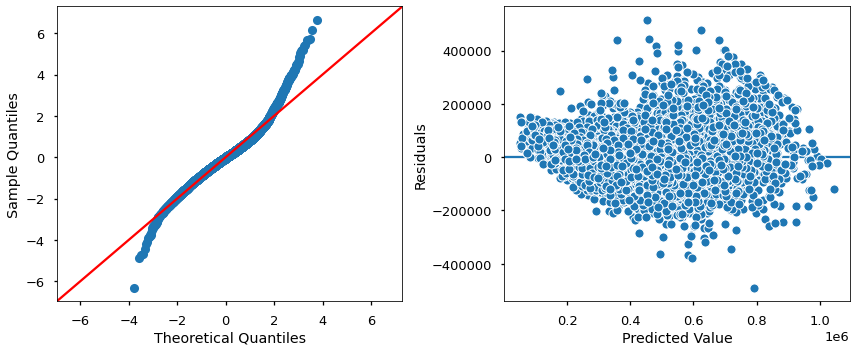

In [54]:
X_train_df, X_test_df, y_train, y_test = prepare_data(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Multicollinearity 

In [55]:
zip_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]

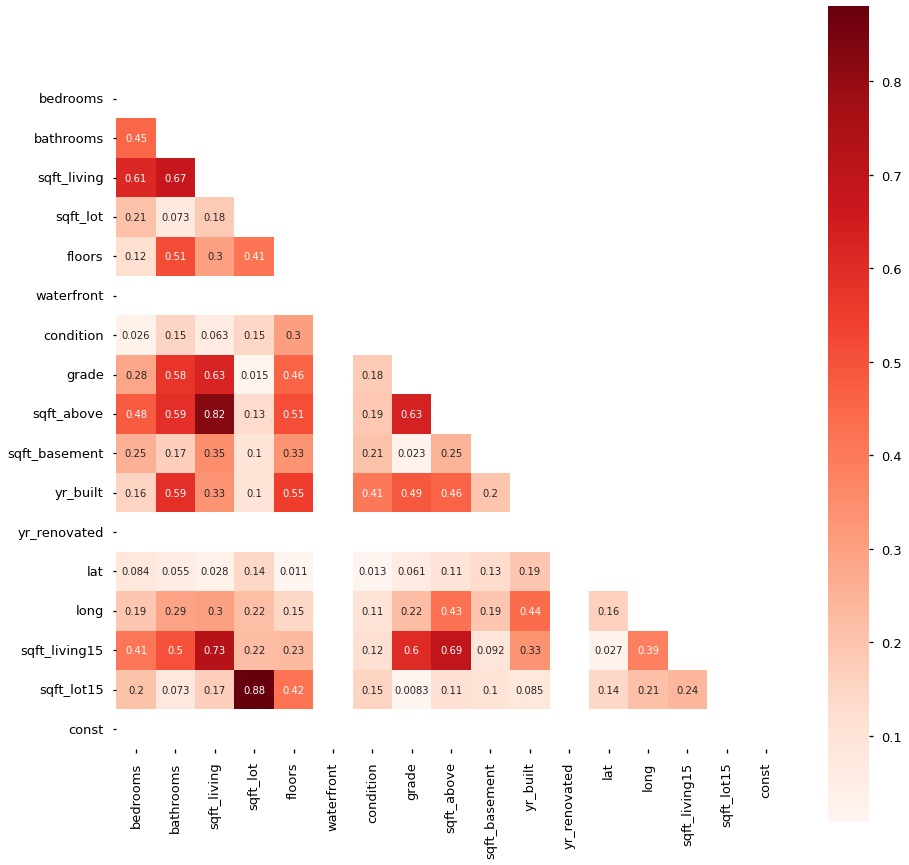

In [56]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(15,15))
corr = X_train_df.drop(columns=zip_cols).corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
3397,-1.2663,-0.9834,-652.1289,"2,340.3238",-0.4688,0.0000,-0.4246,-1.4009,-407.2192,-244.9098,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,0.9860,-0.0071,-0.0147,-0.0138,0.0000
3426,-0.2663,0.0166,-142.1289,"-1,909.6762",0.0312,0.0000,1.5754,-0.4009,102.7808,-244.9098,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
17622,-0.2663,-0.4834,407.8711,"-1,709.6762",-0.4688,0.0000,1.5754,-0.4009,-467.2192,875.0902,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
2932,-1.2663,-0.9834,-992.1289,"-1,744.6762",-0.4688,0.0000,1.5754,-1.4009,-747.2192,-244.9098,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
2994,-0.2663,0.0166,-432.1289,"-5,352.6762",0.5312,0.0000,-0.4246,0.5991,-527.2192,95.0902,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,-1.2663,-0.9834,-662.1289,"-1,009.6762",-0.4688,0.0000,-0.4246,-1.4009,-417.2192,-244.9098,...,-0.0030,-0.0239,-0.0105,0.9868,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
15142,-0.2663,0.5166,277.8711,"1,294.3238",-0.4688,0.0000,0.5754,-0.4009,522.7808,-244.9098,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
5855,0.7337,0.5166,207.8711,"-2,009.6762",0.0312,0.0000,1.5754,-0.4009,-407.2192,615.0902,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000
9223,-0.2663,-0.9834,-732.1289,"-1,309.6762",-0.4688,0.0000,-0.4246,-0.4009,-487.2192,-244.9098,...,-0.0030,-0.0239,-0.0105,-0.0132,-0.0119,-0.0140,-0.0071,-0.0147,-0.0138,0.0000


In [58]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


bedrooms        1.7795
bathrooms       2.9927
sqft_living        inf
sqft_lot        4.7588
floors          3.0679
                 ...  
zipcode_98178      inf
zipcode_98188      inf
zipcode_98198      inf
zipcode_98199      inf
const              NaN
Length: 86, dtype: float64

In [59]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [60]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

condition        1.37
bedrooms         1.78
grade            2.66
sqft_living15    2.84
bathrooms        2.99
floors           3.07
yr_built         3.38
sqft_lot         4.76
sqft_lot15       5.29
long            66.07
lat             83.41
waterfront        NaN
yr_renovated      NaN
const             NaN
dtype: float64

In [61]:
## filter for VIF that are > 5
VIF[VIF>5]

sqft_lot15    5.29
long         66.07
lat          83.41
dtype: float64

In [62]:
high_vif = VIF[VIF>5].index
high_vif

Index(['sqft_lot15', 'long', 'lat'], dtype='object')

In [63]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.824
Testing R^2: 0.817


### Visualizing Coeffiicents

In [64]:
result.params

bedrooms          -3424.96
bathrooms         11060.45
sqft_living          66.01
sqft_lot              1.03
floors           -13781.99
                   ...    
zipcode_98178    -55379.94
zipcode_98188    -70957.20
zipcode_98198    -80778.92
zipcode_98199    256012.23
const           4683466.14
Length: 86, dtype: float64

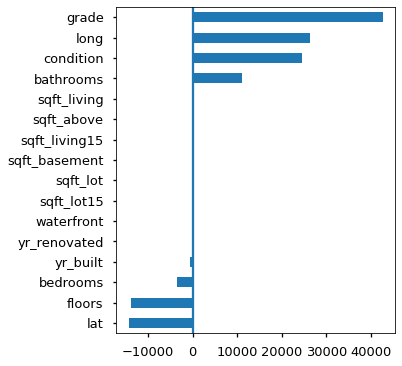

In [65]:
plt.figure(figsize=(5,6))
ax =result.params.drop([*zip_cols,'const']).sort_values().plot(kind='barh')
ax.axvline()

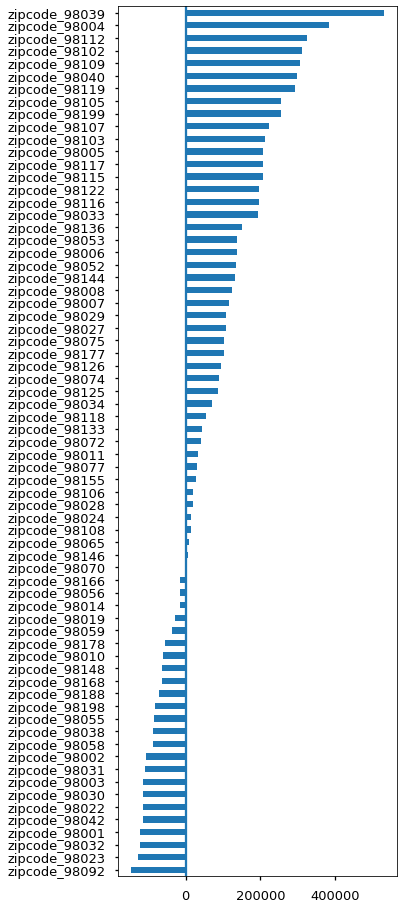

In [66]:
plt.figure(figsize=(5,16))
ax =result.params.loc[zip_cols].sort_values().plot(kind='barh')
ax.axvline()